In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [2]:
hists={}
pd = []
year = 'NLO_2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]


pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

ZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 558251.7187889507
GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 19051574.496664558
GJets_HT-600ToInf_TuneCP5_13TeV-madgraphMLM-pythia8 4970069.563275842
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 179747863920.7151
ggZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 26961.832887386816
WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8 8357921.270734889
DYJetsToLL_M-50_HT-600to800_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 8826238.149146453
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 5913597.7743131835
DYJetsToLL_M-50_HT-800to1200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 3120982.1060653282
WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8 7586023.159681609
ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 266470421.9656856
DYJetsToLL_M-50_HT-2500toInf_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 415517.02193442243
DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 9614508.800390538
WW_Tu

In [3]:
data_hists={}

for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)

#process_map["Znunu"] = ("ZJets*",)

#data_r_map['isoneE'] = 'SingleElectron'
#data_r_map['isoneM'] = 'MET'
#data_r_map['istwoE'] = 'SingleElectron'
#data_r_map['istwoM'] = 'MET'
#data_r_map['isoneA'] = 'SinglePhoton'
#data_r_map['iszeroL'] = 'MET'

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

print(hists['recoil'].identifiers('process'))

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
nfjets
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TvsQCD
hSvsQCD
VvsQCD
['Hbb', 'Zjets', 'Diboson', 'ST', 'TT', 'Wjets']


In [5]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [6]:
hists['recoil'].project('process','Hbb').values()

{('iszeroL',
  'baggy'): array([3.27768525e+00, 1.85708851e+00, 1.12553922e+00, 6.97754575e-01,
        4.82211894e-01, 2.77184099e-01, 2.49247053e-01, 1.34209840e-01,
        8.15846934e-02, 5.02000341e-02, 5.70110546e-02, 1.32010417e-02,
        1.37295332e-02, 1.23201234e-02, 2.18243987e-03, 1.01376835e-02,
        2.79856761e-03, 0.00000000e+00, 0.00000000e+00, 2.79856761e-03,
        0.00000000e+00]),
 ('iszeroL',
  'skinny'): array([3.35334310e+00, 1.90675878e+00, 1.19494583e+00, 7.47294388e-01,
        4.20434784e-01, 2.93597931e-01, 2.53388354e-01, 1.55245380e-01,
        9.11477037e-02, 4.87155064e-02, 3.77934468e-02, 2.29032817e-03,
        5.22594207e-03, 5.52935495e-03, 1.33767103e-02, 2.79856761e-03,
        0.00000000e+00, 8.36771718e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 ('iszeroL',
  'inclusive'): array([6.63102835e+00, 3.76384729e+00, 2.32048505e+00, 1.44504896e+00,
        9.02646678e-01, 5.70782030e-01, 5.02635406e-01, 2.89455220e-01,
       

In [71]:
data_map['isoneE'] = 'SingleElectron'
data_map['isoneM'] = 'MET'
data_map['istwoE'] = 'SingleElectron'
data_map['istwoM'] = 'MET'
data_map['isoneA'] = 'SinglePhoton'
data_map['iszeroL'] = 'MET'

for r in hists['recoil'].identifiers('region'):
   exp = 0
   print('------------------')
   print('------------------')
   print('Category:',r)
   print('------------------')
   for p in hists['recoil'].identifiers('process'):
        for s in hists['recoil'].identifiers('jet_selection'):
            print (hists['recoil'])
            print (r,p,s,hists['recoil'].project('jet_selection',s).project('region',r).project('process', p).values(overflow='all'))
            yld = np.sum(hists['recoil'].project('jet_selection',s).project('region',r).project('process', p).values(overflow='all')[()])
            exp += yld
            print(p, '%.1f' % yld)        
   print('------------------')
   print('Total expected:', '%.1f' % exp)
   print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',s).project('region',r).project('process', data_map[r]).values(overflow='all')[()]))
   print('------------------')
   print('------------------')
   print() 

------------------
------------------
Category: isoneE
------------------
<Hist (process,region,jet_selection,recoil) instance at 0x7f2bb6eaef60>
isoneE Hbb baggy {(): array([0.        , 1.48804549, 1.05066037, 0.65171647, 0.47374064,
       0.31839742, 0.21368445, 0.18553573, 0.14461632, 0.08205528,
       0.07100538, 0.03791197, 0.02399613, 0.01727315, 0.00802451,
       0.00924864, 0.00454055, 0.01580408, 0.00672299, 0.00174198,
       0.00279857, 0.        , 0.00174198])}
Hbb 4.8
<Hist (process,region,jet_selection,recoil) instance at 0x7f2bb6eaef60>
isoneE Hbb inclusive {(): array([0.00000000e+00, 2.96787762e+00, 1.94880958e+00, 1.35745498e+00,
       9.61005172e-01, 6.38313615e-01, 4.04299360e-01, 3.95924525e-01,
       2.97314931e-01, 1.60867886e-01, 1.17262622e-01, 7.49628104e-02,
       3.36255774e-02, 3.52596698e-02, 1.81621932e-02, 1.55137448e-02,
       8.02450967e-03, 1.86026524e-02, 6.72298816e-03, 1.74198069e-03,
       2.79856761e-03, 0.00000000e+00, 1.74198069e-03])}
H

istwoE Hbb skinny {(): array([0.        , 0.0216075 , 0.01088917, 0.00307431, 0.00391795,
       0.0031822 , 0.00010789, 0.00098881, 0.00098881, 0.        ,
       0.        , 0.00054835, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])}
Hbb 0.0
<Hist (process,region,jet_selection,recoil) instance at 0x7f2bb6eaef60>
istwoE Zjets baggy {(): array([0.00000000e+00, 1.65577875e+02, 9.16839256e+01, 5.49042151e+01,
       3.71106266e+01, 1.86009957e+01, 1.18199531e+01, 8.87321777e+00,
       5.44712918e+00, 3.14513971e+00, 1.82967097e+00, 1.29714012e+00,
       7.98601410e-01, 4.32186172e-01, 4.67628605e-01, 1.24863125e-01,
       8.75804173e-02, 6.68185591e-02, 2.66754099e-02, 3.27711608e-02,
       2.14411002e-02, 1.57679223e-02, 1.82147347e-03])}
Zjets 402.4
<Hist (process,region,jet_selection,recoil) instance at 0x7f2bb6eaef60>
istwoE Zjets inclusive {(): array([0.00000000e+00, 2.44653768e+0

iszeroL ST baggy {(): array([0.00000000e+00, 5.56003228e+02, 3.34343688e+02, 1.84535954e+02,
       1.10341361e+02, 7.03218993e+01, 4.53978814e+01, 3.67752507e+01,
       2.58252120e+01, 1.70302462e+01, 1.03719301e+01, 1.08870587e+01,
       3.64878664e+00, 4.87430520e+00, 2.02011202e+00, 1.79655456e+00,
       6.76273641e-01, 1.17570038e+00, 9.49907337e-01, 2.23557457e-01,
       2.81470548e-01, 2.81470548e-01, 5.02213312e-01])}
ST 1418.3
<Hist (process,region,jet_selection,recoil) instance at 0x7f2bb6eaef60>
iszeroL ST inclusive {(): array([0.00000000e+00, 1.24345392e+03, 7.04022618e+02, 3.96953342e+02,
       2.28059109e+02, 1.45417242e+02, 9.04617120e+01, 7.96141864e+01,
       5.27863786e+01, 3.12566741e+01, 1.88452038e+01, 1.76583862e+01,
       7.40530455e+00, 7.17083749e+00, 5.48482889e+00, 3.08808112e+00,
       1.62841656e+00, 2.24366948e+00, 1.17346479e+00, 2.23557457e-01,
       8.44411645e-01, 2.81470548e-01, 7.83683860e-01])}
ST 3038.9
<Hist (process,region,jet_selection,

In [81]:
# graph adjusmnet
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

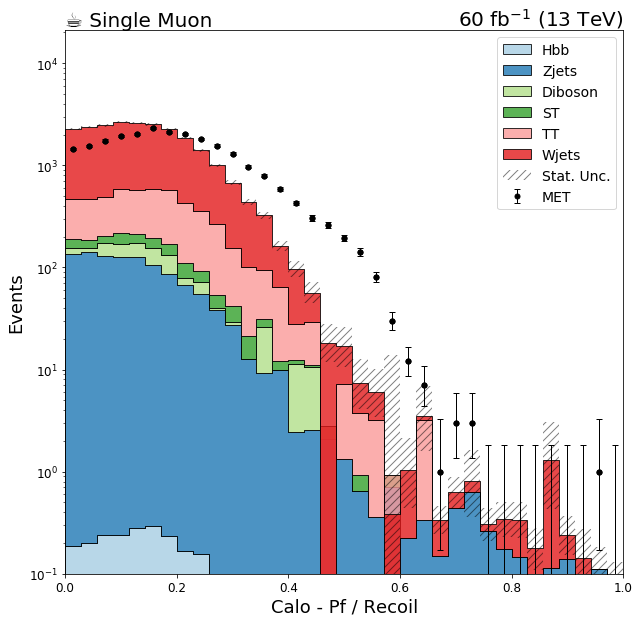

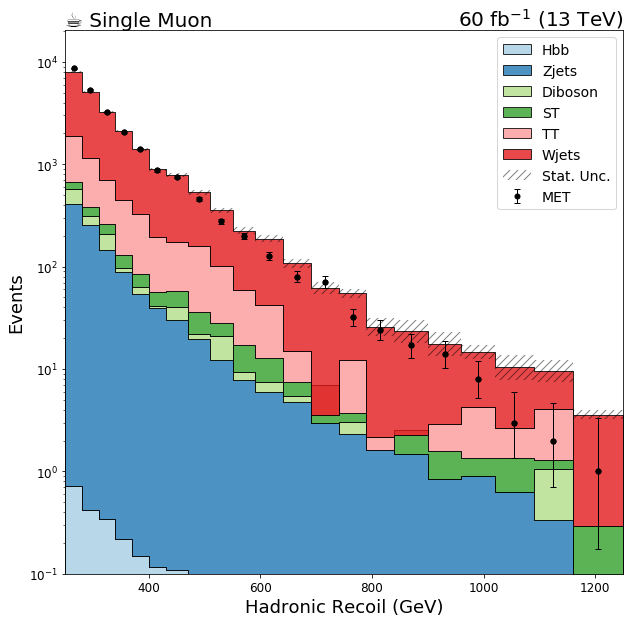

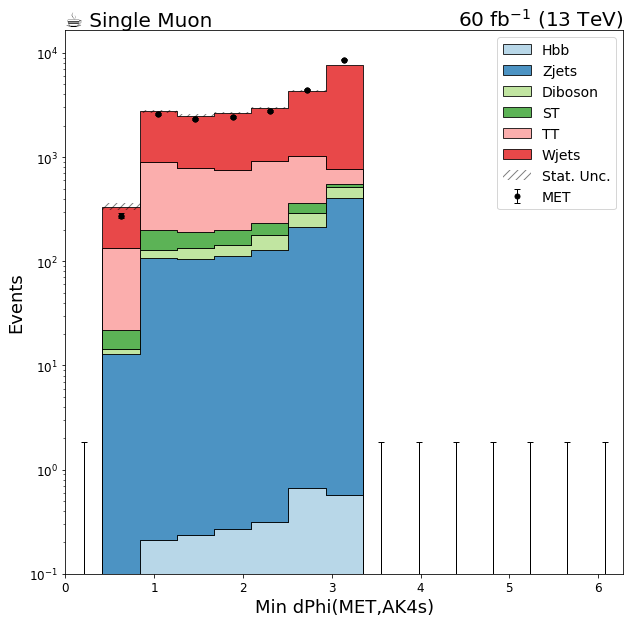

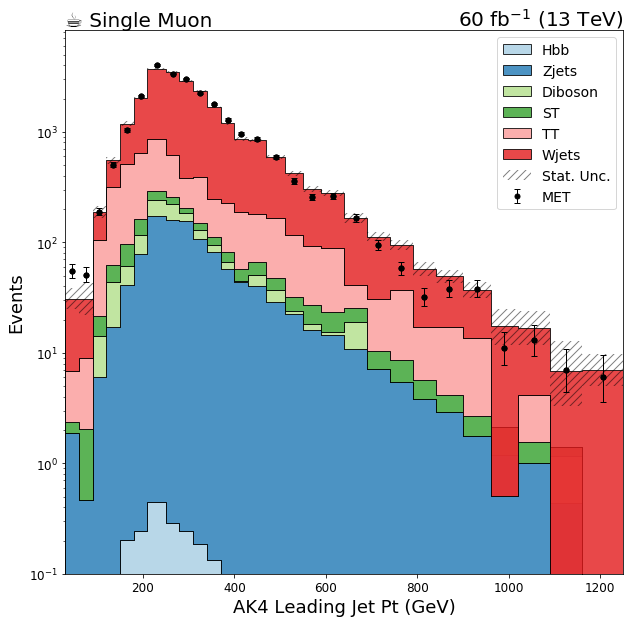

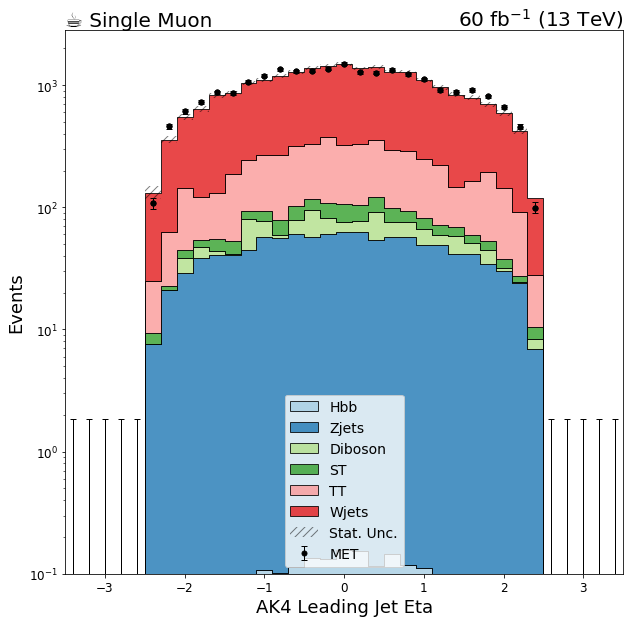

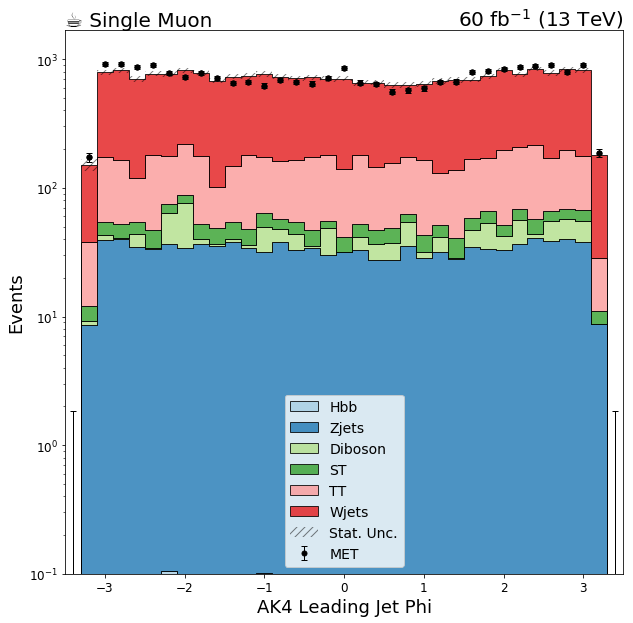

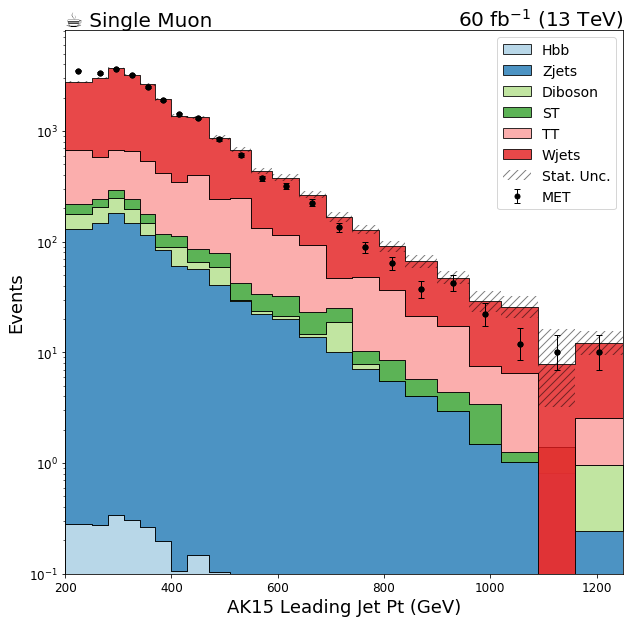

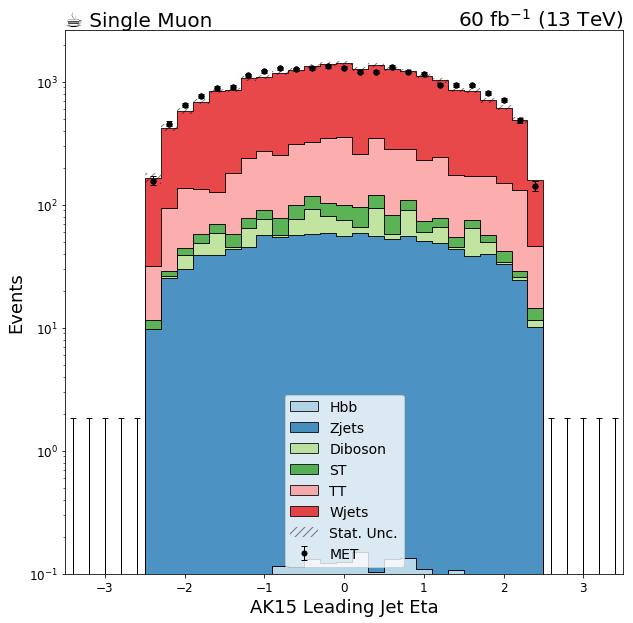

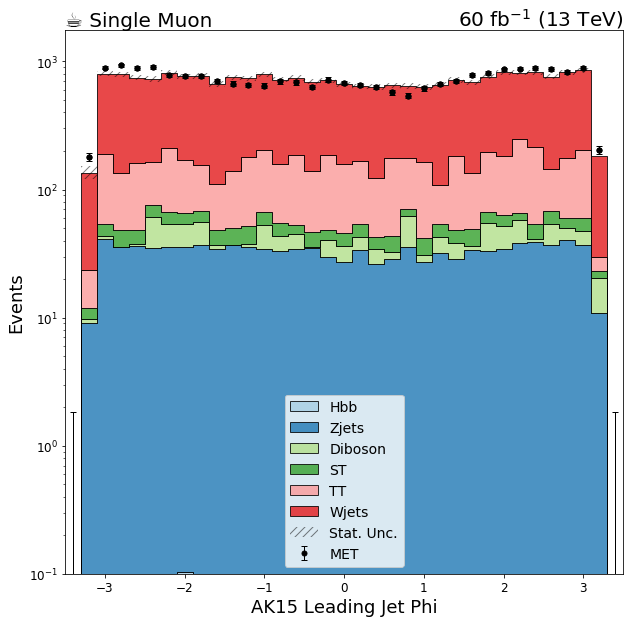

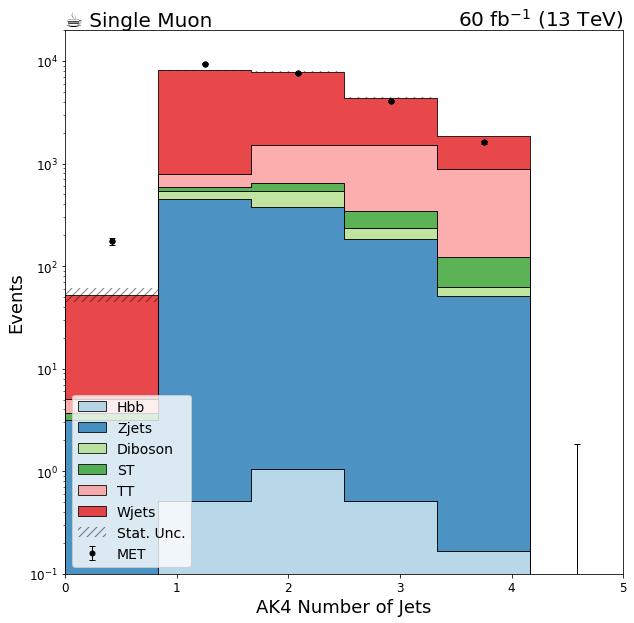

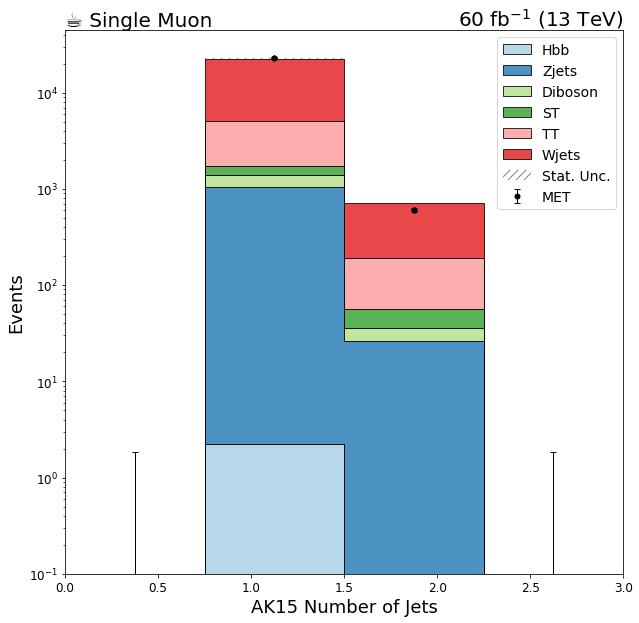

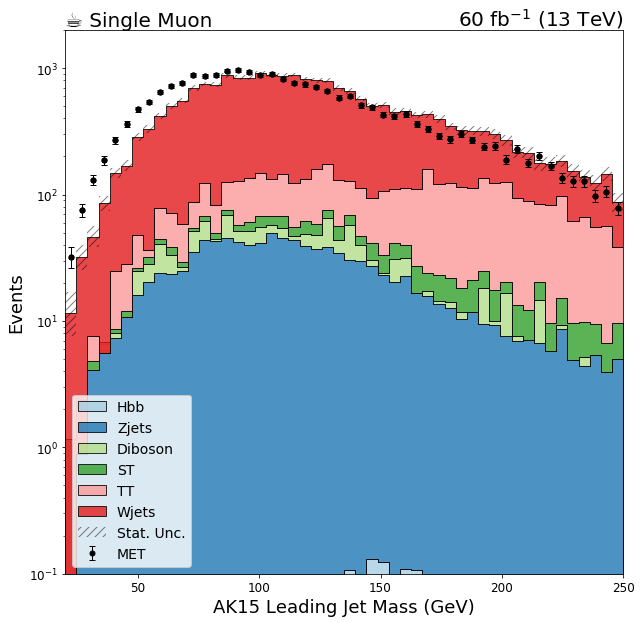

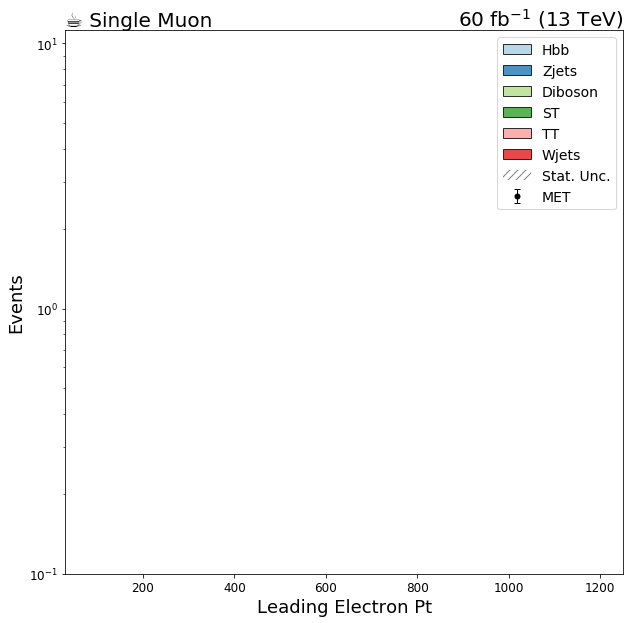

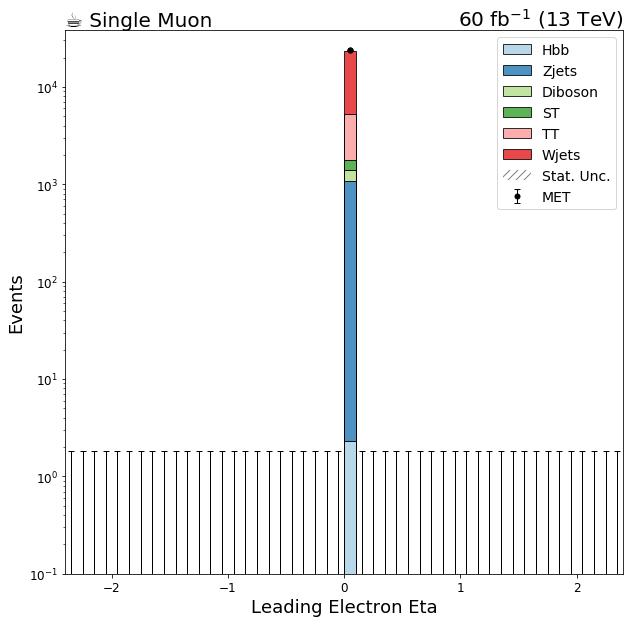

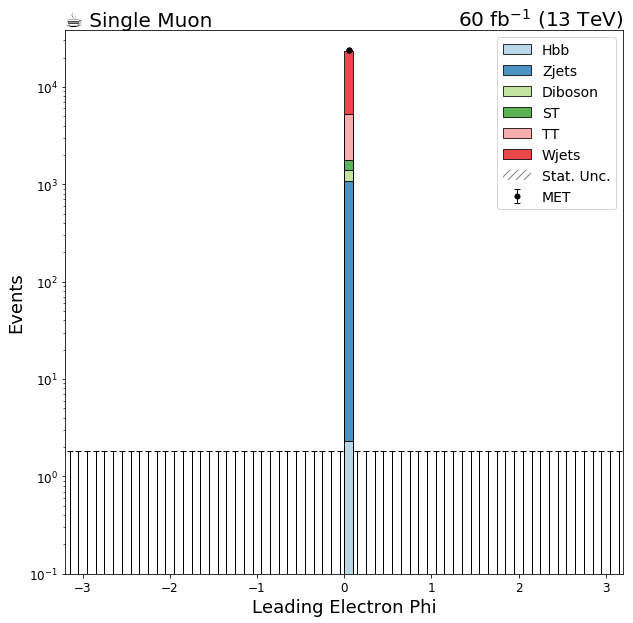

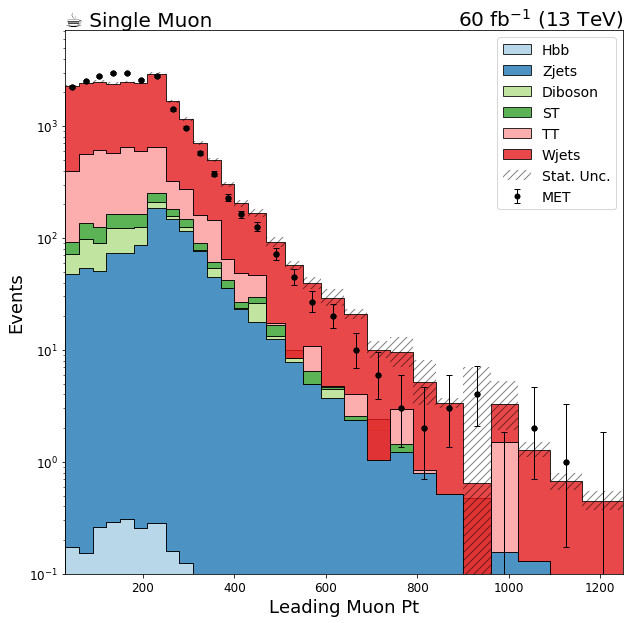

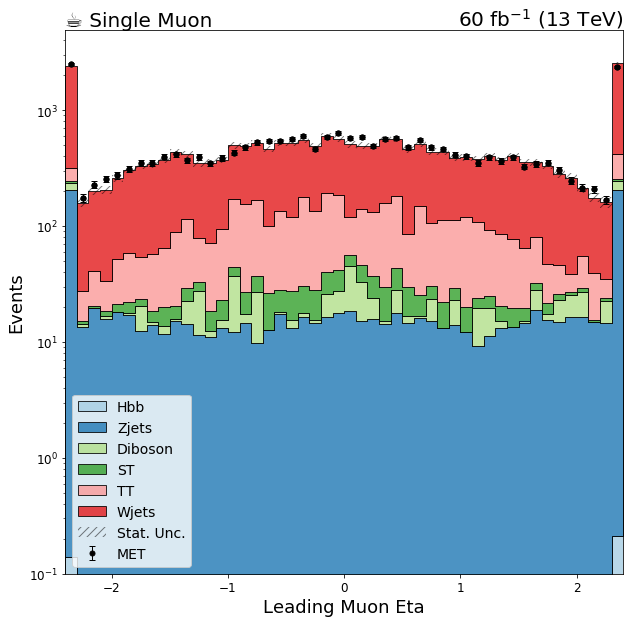

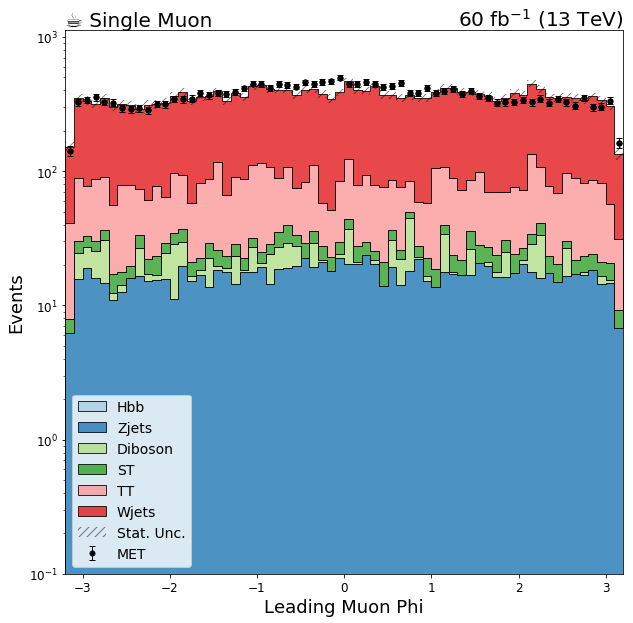

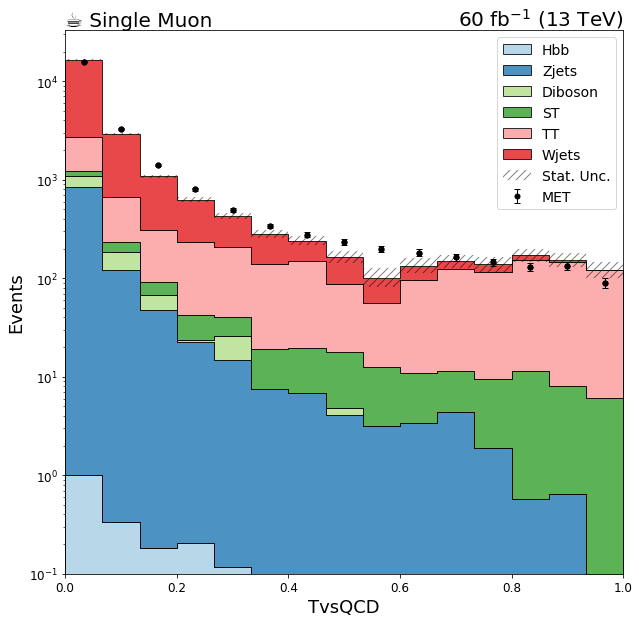

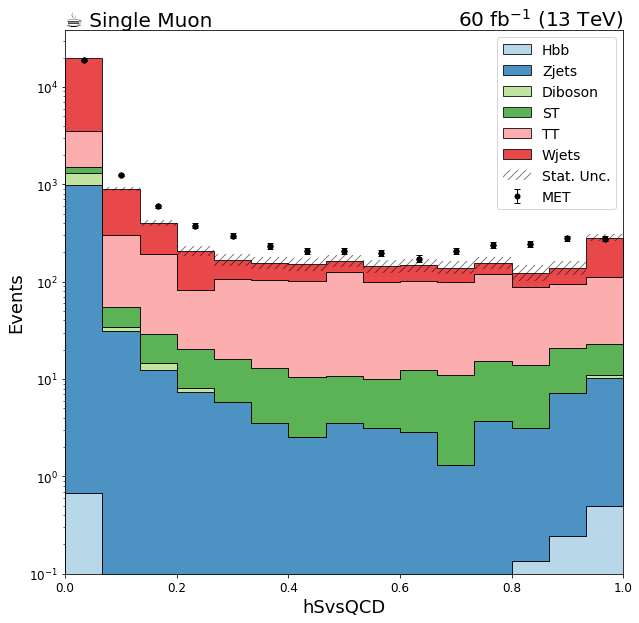

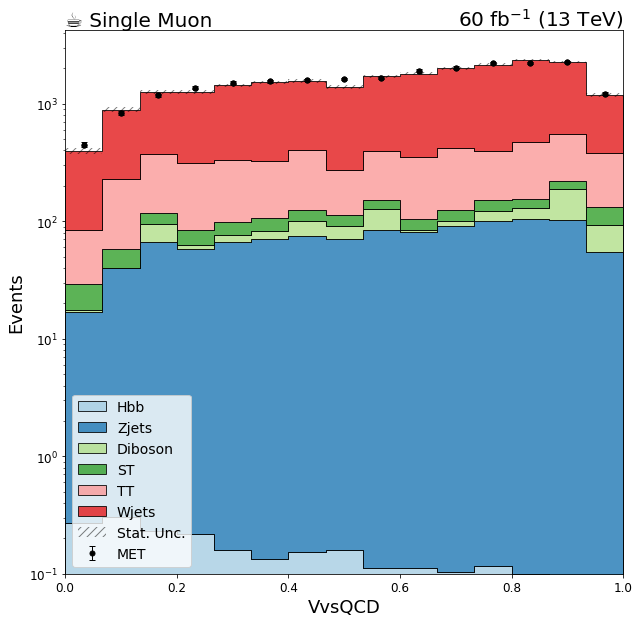

In [82]:
from cycler import cycler

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,clear=False,
            stack=True,
            line_opts=None,
            fill_opts=fill_opts,
            error_opts=error_opts)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"60 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)


In [ ]:
# save stack
plot_path = os.path.abspath('stack') 
plot_name = 'stack'+key+'.png'
fig.savefig(os.path.join(plot_path, plot_name))

In [ ]:
for key in hists.keys():
    if key=='sumw': continue

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)